# Converting CKG to Sample and Data Relationship Format for Proteomics (SDRF-Proteomics)

## Abstract

Metadata is essential in proteomics data repositories and is crucial to interpret and reanalyze the deposited data sets. For every proteomics data set, we should capture at least three levels of metadata: (i) data set description, (ii) the sample to data files related information, and (iii) standard data file formats (e.g., mzIdentML, mzML, or mzTab). While the data set description and standard data file formats are supported by all ProteomeXchange partners, the information regarding the sample to data files is mostly missing. Recently, members of the European Bioinformatics Community for Mass Spectrometry (EuBIC) have created an open-source project called Sample to Data file format for Proteomics (https://github.com/bigbio/proteomics-metadata-standard/) to enable the standardization of sample metadata of public proteomics data sets. Here, the project is presented to the proteomics community, and we call for contributors, including researchers, journals, and consortiums to provide feedback about the format. We believe this work will improve reproducibility and facilitate the development of new tools dedicated to proteomics data analysis.

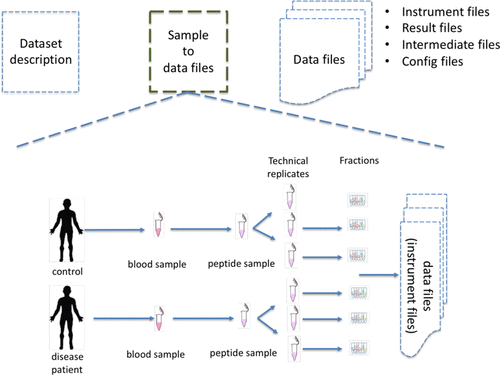


Here, we show how to easily convert CKG projects into SDRF-proteomcis standard. This data standard is included in every report generated with CKG and can be shared when submitting to [PRIDE](https://www.ebi.ac.uk/pride/).

In [1]:
from ckg.graphdb_builder import builder_utils as utils
from ckg.report_manager import project

c:\users\sande\.conda\envs\pip_rev\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



WGCNA functions will not work. Module Rpy2 not installed.
R functions will not work. Module Rpy2 not installed.


### Get SDRF format for a specific project

Here, we create a Project object for project P0000014 and use the function `get_sdrf()` to convert from CKG standard to SDRF format. This function will map the ontologies in CKG to the Experimental factor ontology (https://www.ebi.ac.uk/efo/) required in SDRF format.

In [2]:
my_project = project.Project(identifier="P0000014", configuration_files={}, datasets={}, knowledge=None, report={})

In [3]:
sdrf_df = my_project.get_sdrf()
sdrf_df.head()

,characteristics[individual],source name,comment[data file],characteristics[phenotype],characteristics[organism part],characteristics[alkaline phosphatase measurement],characteristics[aspartate aminotransferase measurement],characteristics[bilirubin measurement],characteristics[body mass index],characteristics[fasting blood glucose measurement],characteristics[low density lipoprotein cholesterol measurement],characteristics[serum alanine aminotransferase measurement],characteristics[waist circumference]
0,31,31,31_C6,Healthy,blood plasma,54.0,30.0,15.0,27.774423,5.07,2.1,24.0,108.0
1,32,32,32_C7,Healthy,blood plasma,27.0,28.0,17.0,28.727377,6.09,4.3,27.0,108.0
2,33,33,33_C8,Healthy,blood plasma,69.0,21.0,9.0,28.841532,4.93,4.1,18.0,90.0
3,34,34,34_C9,Healthy,blood plasma,101.0,26.0,12.0,42.056933,5.33,4.8,22.0,134.0
4,35,35,35_C10,Healthy,blood plasma,61.0,25.0,8.0,29.434851,4.80,3.9,18.0,102.0


## Convert SDRF to CKG

Conversely, we can convert a SDRF dataframe to CKG standard using the function `convert_sdrf_to_ckg()`. The generated dataframe could be used as the *Clinical data* for a project and uploaded through the **Data upload app**. Notice that the generated dataframe also contains the required columns in the *Experimental design* (subject external_id, biological_sample external_id, analytical_sample external_id and grouping1).

In [4]:
df = utils.convert_sdrf_to_ckg(sdrf_df)
df.head()

,subject external_id,biological_sample external_id,analytical_sample external_id,grouping1,tissue,Alkaline phosphatase measurement (88810008),Aspartate aminotransferase measurement (45896001),Bilirubin level (302787001),Body mass index (60621009),Fasting blood glucose level (271062006),Low density lipoprotein cholesterol measurement (113079009),Alanine aminotransferase measurement (34608000),Waist circumference (276361009)
0,31,31,31_C6,Healthy,blood plasma,54.0,30.0,15.0,27.774423,5.07,2.1,24.0,108.0
1,32,32,32_C7,Healthy,blood plasma,27.0,28.0,17.0,28.727377,6.09,4.3,27.0,108.0
2,33,33,33_C8,Healthy,blood plasma,69.0,21.0,9.0,28.841532,4.93,4.1,18.0,90.0
3,34,34,34_C9,Healthy,blood plasma,101.0,26.0,12.0,42.056933,5.33,4.8,22.0,134.0
4,35,35,35_C10,Healthy,blood plasma,61.0,25.0,8.0,29.434851,4.80,3.9,18.0,102.0


## Converting CKG's *Clinical data* format to SDRF

If we have a dataframe with the CKG's clinical data format, we can also convert it to SDRF using the function `convert_ckg_clinical_to_sdrf()`.

In [5]:
sdrf_df = utils.convert_ckg_clinical_to_sdrf(df)
sdrf_df.head()

,subject external_id,biological_sample external_id,analytical_sample external_id,characteristics[phenotype],characteristics[organism part],characteristic[alkaline phosphatase measurement],characteristic[aspartate aminotransferase measurement],characteristic[bilirubin measurement],characteristic[body mass index],characteristic[fasting blood glucose measurement],characteristic[low density lipoprotein cholesterol measurement],characteristic[serum alanine aminotransferase measurement],characteristic[waist circumference]
0,31,31,31_C6,Healthy,blood plasma,54.0,30.0,15.0,27.774423,5.07,2.1,24.0,108.0
1,32,32,32_C7,Healthy,blood plasma,27.0,28.0,17.0,28.727377,6.09,4.3,27.0,108.0
2,33,33,33_C8,Healthy,blood plasma,69.0,21.0,9.0,28.841532,4.93,4.1,18.0,90.0
3,34,34,34_C9,Healthy,blood plasma,101.0,26.0,12.0,42.056933,5.33,4.8,22.0,134.0
4,35,35,35_C10,Healthy,blood plasma,61.0,25.0,8.0,29.434851,4.80,3.9,18.0,102.0
